In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
import dtale
dtale.show(df)

2021-11-11 15:10:13,575 - INFO     - NumExpr defaulting to 8 threads.


In [3]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Need to drop some useless columns.

In [4]:
df.drop(['_c39', 'policy_number', 'insured_zip', 'incident_location', 'policy_bind_date', 'incident_date' ], axis=1, inplace=True)

In [5]:
df = df.replace('?', np.NaN)

In [6]:
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


As we have replaced all ? marks with NaN values we can now check which all columns have NaN values and we can fill them with appropriate imputation method,

In [7]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

So there are three colums which we have to fill the missing values in. 

In [8]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

Now in real, there are no missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [11]:
#To display plot in center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

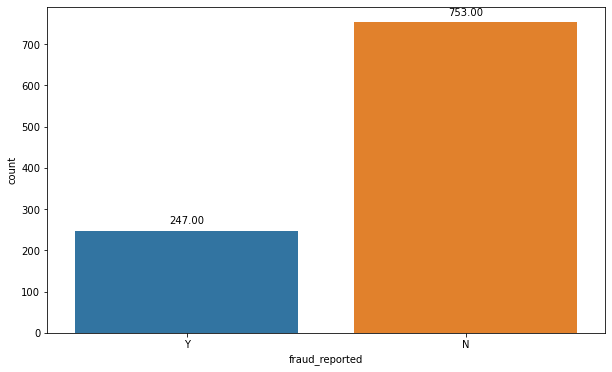

In [18]:
plt.figure(figsize=[10,6])
ps =sns.countplot(data=df, x= 'fraud_reported')
for p in ps.patches:
    ps.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

There is clear cut class imbalance, hence we need to balace the classes before fitting the model.

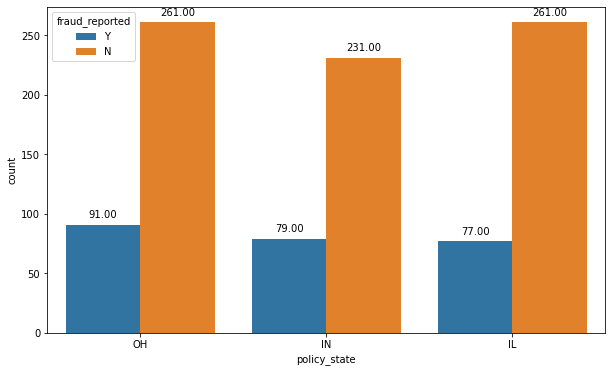

In [19]:
plt.figure(figsize=[10,6])
ps =sns.countplot(data=df, x= 'policy_state', hue='fraud_reported')
for p in ps.patches:
    ps.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The percentage of fraud reported are almost same in all the policy states ranging between 23% to 25%

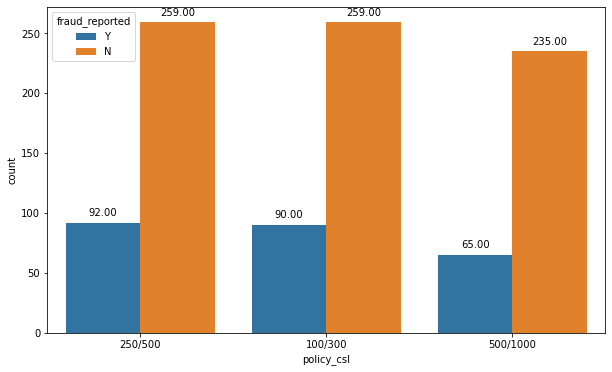

In [20]:
plt.figure(figsize=[10,6])
iss =sns.countplot(data=df, x= 'policy_csl', hue='fraud_reported')
for p in iss.patches:
    iss.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The least frauds were reported where the policy_csl is 500/1000, i.e. 22%. In other policy_csl it is around 26%.

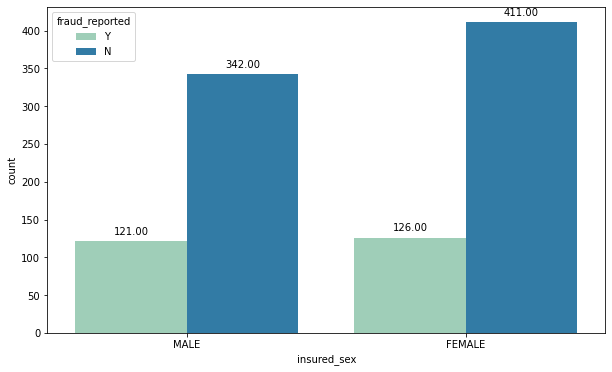

In [21]:
plt.figure(figsize=[10,6])
iss =sns.countplot(data=df, x= 'insured_sex', hue='fraud_reported', palette='YlGnBu')
for p in iss.patches:
    iss.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

There were 26% of males who reported fraud whereas the same for female is 23%.

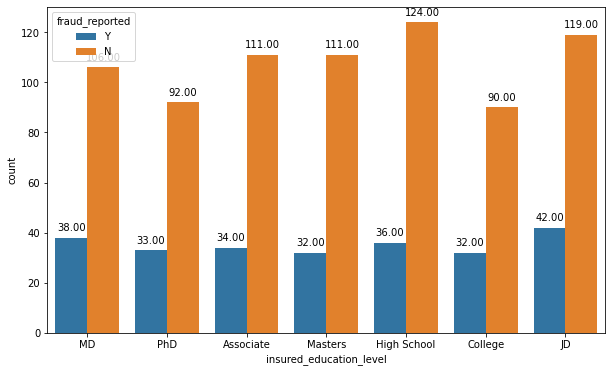

In [22]:
plt.figure(figsize=[10,6])
ie =sns.countplot(data=df, x= 'insured_education_level', hue='fraud_reported')
for p in ie.patches:
    ie.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In most of the cases there are 26% of people in all educational level have reported fraud. The least educational level is Associate which is 22%

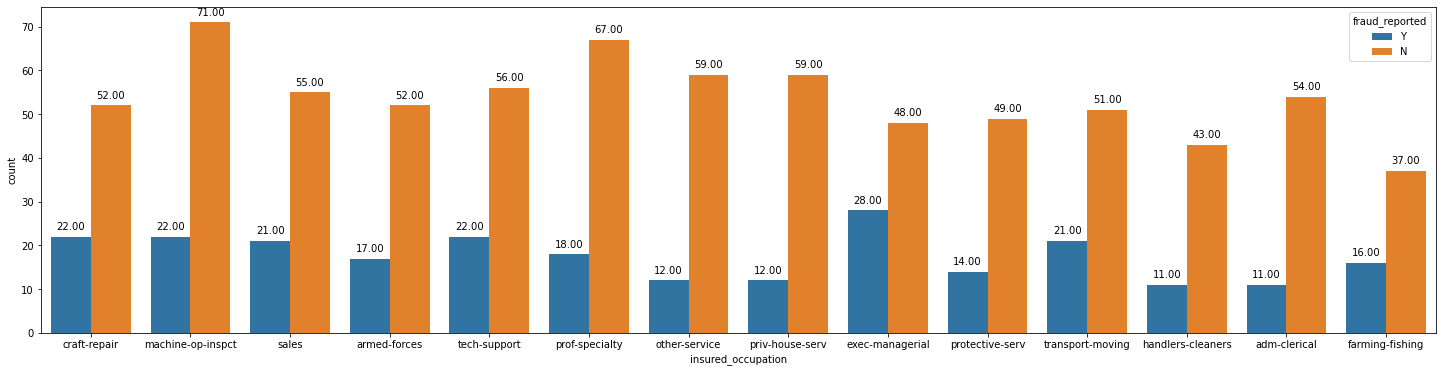

In [23]:
plt.figure(figsize=[25,6])
io =sns.countplot(data=df, x= 'insured_occupation', hue='fraud_reported')
for p in io.patches:
    io.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The highest fraud reported is by the exec-managerial category people i.e. 37%. Whereas the least fraud reported by people who are in othe-service, priv-house-serv and adm-clerical i.e.17% 

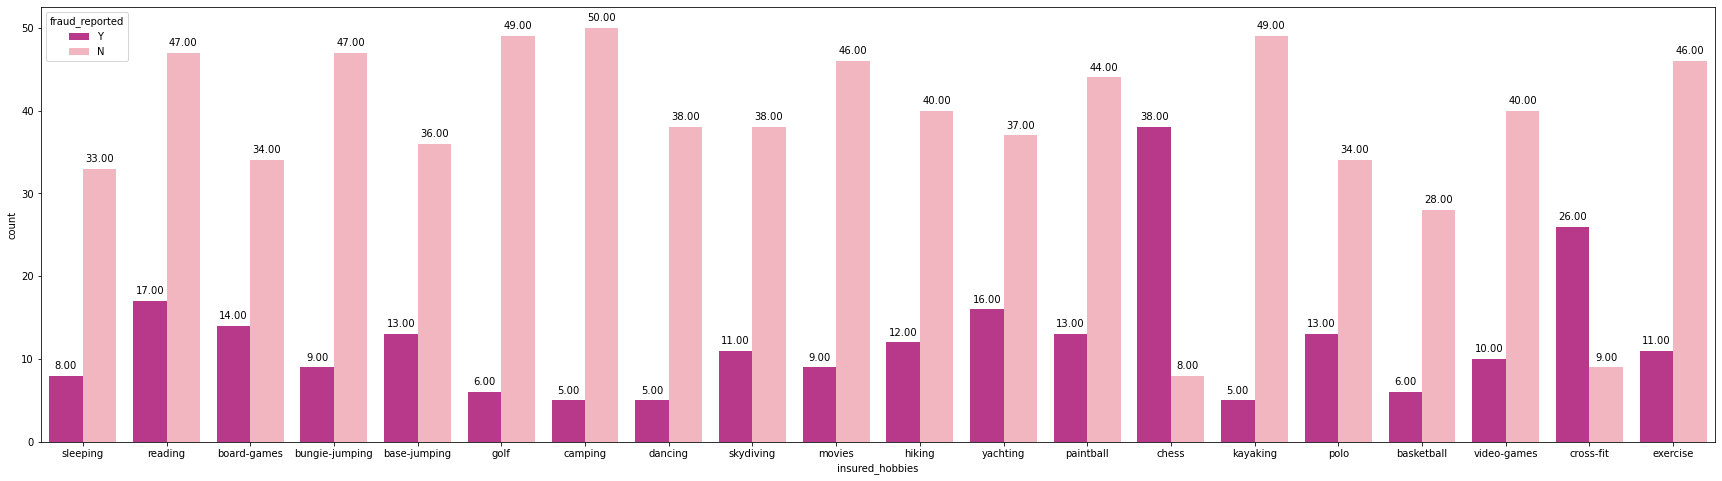

In [24]:
plt.figure(figsize=[30,8])
ih =sns.countplot(data=df, x= 'insured_hobbies', hue='fraud_reported', palette='RdPu_r')
for p in ih.patches:
    ih.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As per the above plot those who have hobby of playing chess have the highest chances of fraud report.

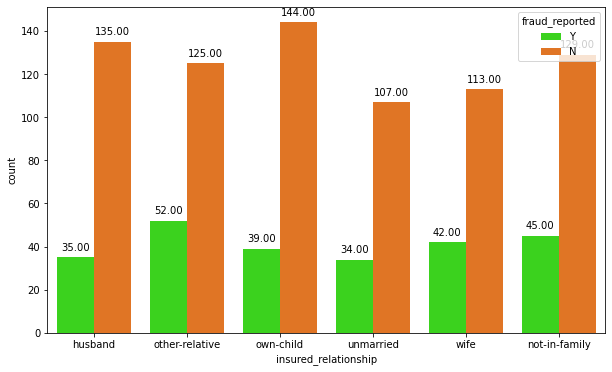

In [25]:
plt.figure(figsize=[10,6])
ir =sns.countplot(data=df, x= 'insured_relationship', hue='fraud_reported', palette='gist_ncar')
for p in ir.patches:
    ir.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Chances of fraud reported are as low as 21% where the insured relationship is husband and own-child.

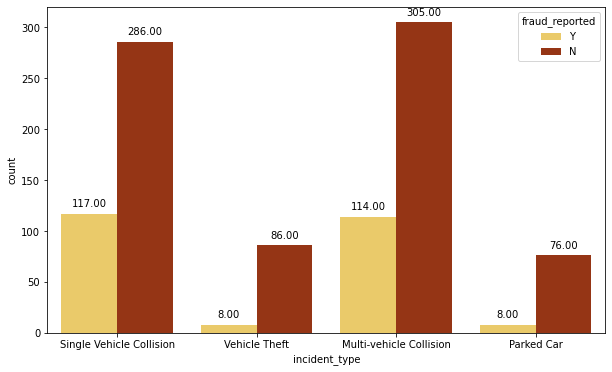

In [26]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'incident_type', hue='fraud_reported', palette='afmhot_r')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Fraud reported were lowest in case of vehicle theft where as highest in the case of single-vehicle Collision.

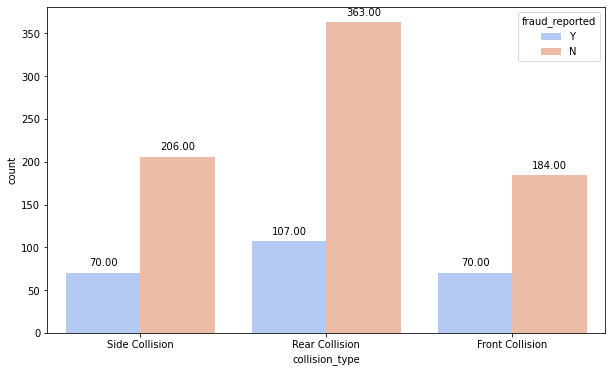

In [27]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'collision_type', hue='fraud_reported', palette='coolwarm')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

 There are 28% people who were fraud reported had side and front collision and 23% people who were fraud reported had rear collision. 

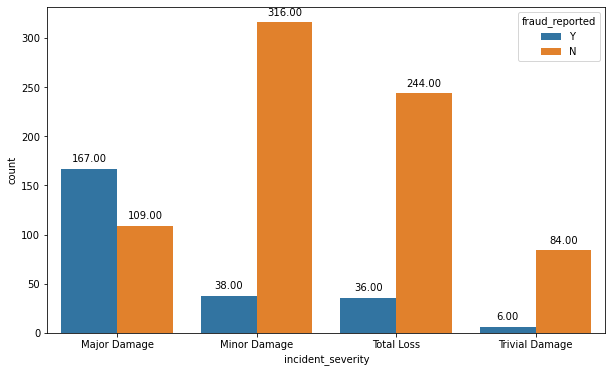

In [28]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'incident_severity', hue='fraud_reported')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In case of Major Damage we can see that the frauds were reported much more higher than any other kind on incident severity.

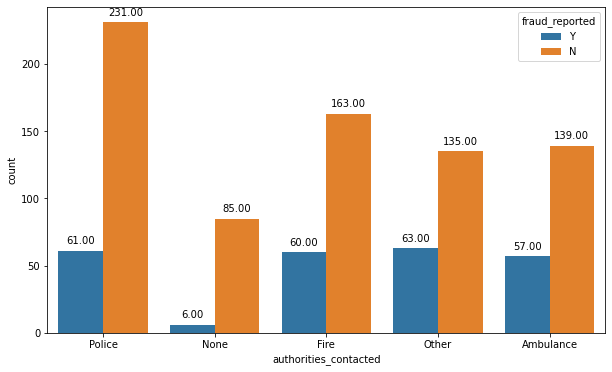

In [29]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'authorities_contacted', hue='fraud_reported')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Only 7% of the frauds reported where none of the authoriy was contacted and 32% of the frauds reported where other authorities were contacted.

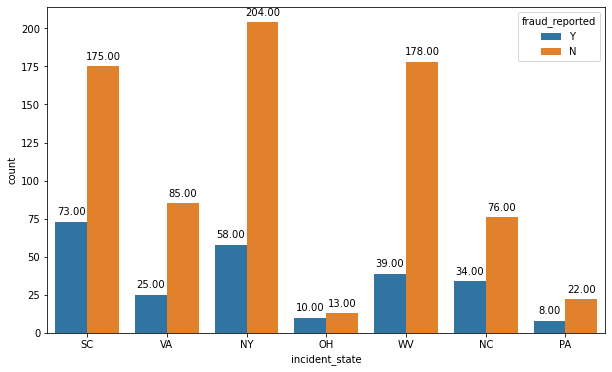

In [30]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'incident_state', hue='fraud_reported')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

OH state has the highest percentage of frauds reported whereas WV state has the lowest.

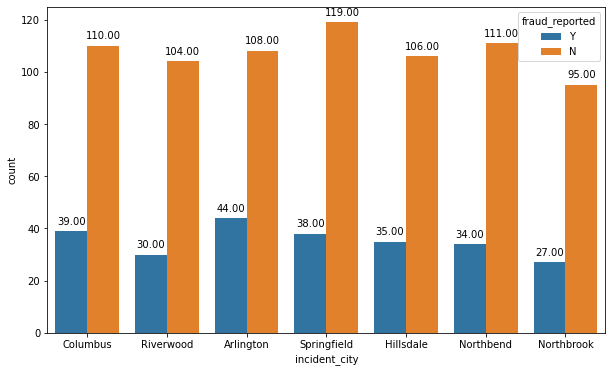

In [31]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'incident_city', hue='fraud_reported')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Lowest reported fraud were the Northbrook city where incident happend whereas Arlington city was the highest for the same.

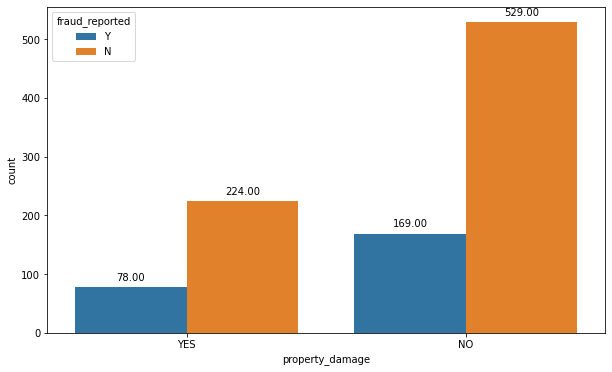

In [32]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'property_damage', hue='fraud_reported')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

26% people who had property damage reported to be fraud whereas 24% people who did not had any property damage.

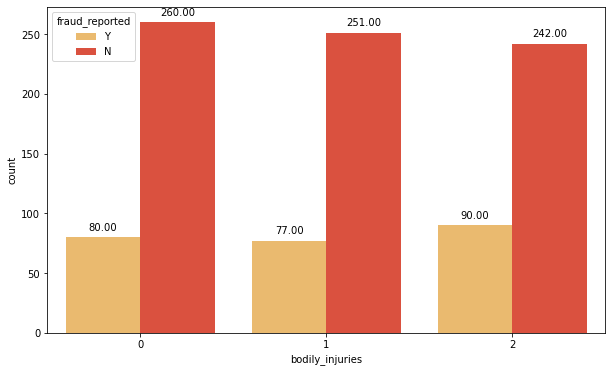

In [33]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'bodily_injuries', hue='fraud_reported', palette ='YlOrRd')
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

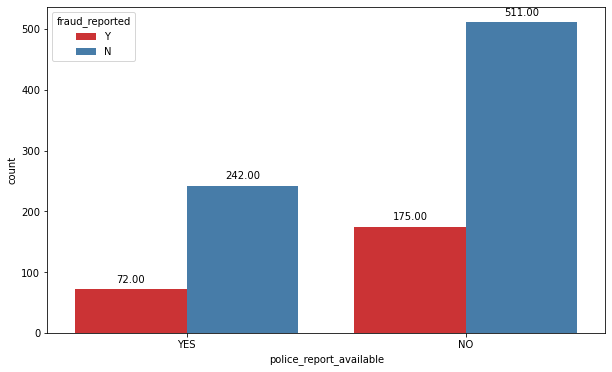

In [34]:
plt.figure(figsize=[10,6])
it =sns.countplot(data=df, x= 'police_report_available', hue='fraud_reported', palette = "Set1")
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

25% of the case where fraud reported had police report avaiable and 23% cases did not had police report avaiable.

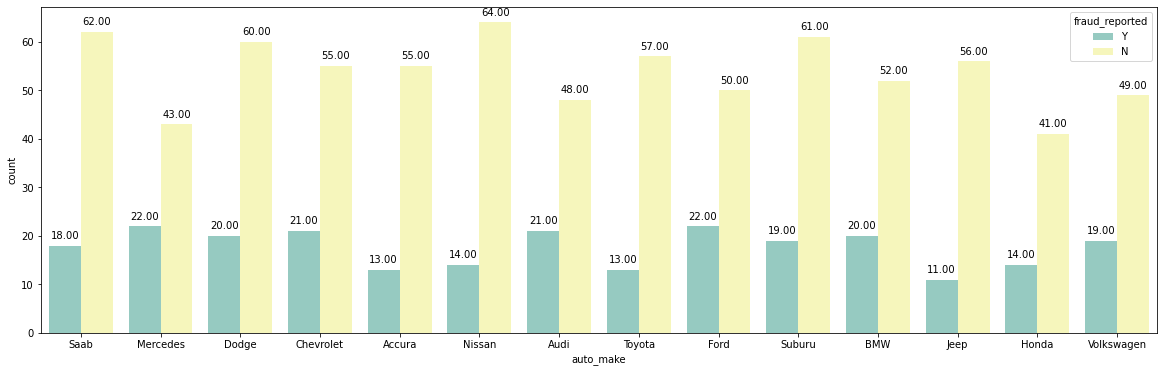

In [35]:
plt.figure(figsize=[20,6])
it =sns.countplot(data=df, x= 'auto_make', hue='fraud_reported', palette="Set3")
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

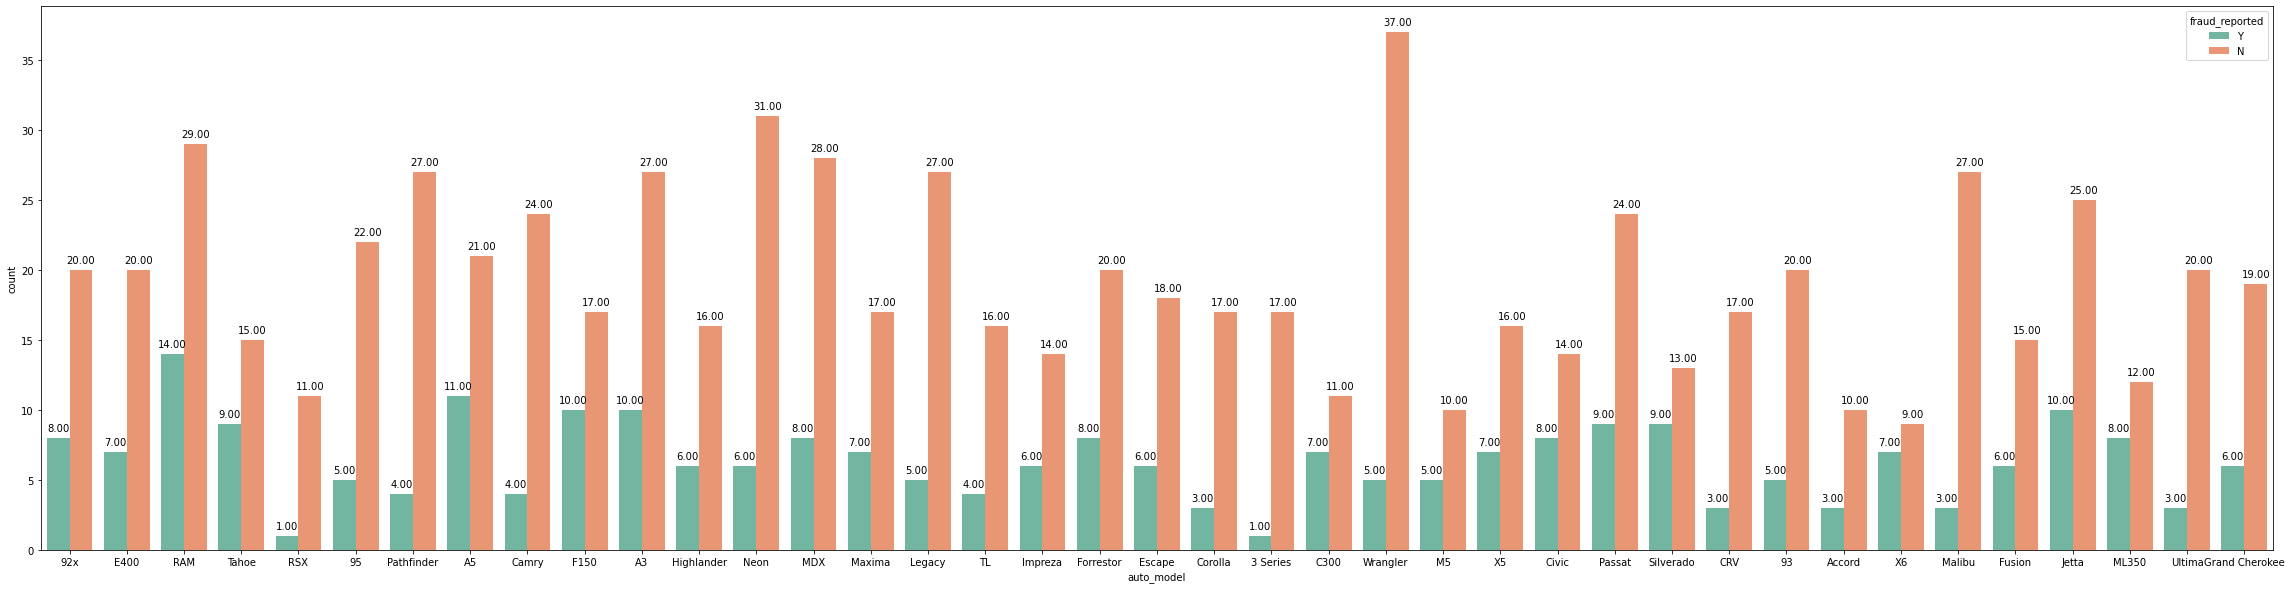

In [36]:
plt.figure(figsize=[40,10])
it =sns.countplot(data=df, x= 'auto_model', hue='fraud_reported', palette = "Set2")
for p in it.patches:
    it.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [37]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['policy_state'] = LE.fit_transform(df['policy_state'])
df['policy_csl'] = LE.fit_transform(df['policy_csl'])
df['insured_sex'] = LE.fit_transform(df['insured_sex'])
df['insured_education_level'] = LE.fit_transform(df['insured_education_level'])
df['insured_occupation'] = LE.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = LE.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = LE.fit_transform(df['insured_relationship'])
df['incident_type'] = LE.fit_transform(df['incident_type'])
df['collision_type'] = LE.fit_transform(df['collision_type'])
df['incident_severity'] = LE.fit_transform(df['incident_severity'])
df['authorities_contacted'] = LE.fit_transform(df['authorities_contacted'])
df['incident_state'] = LE.fit_transform(df['incident_state'])
df['incident_city'] = LE.fit_transform(df['incident_city'])
df['property_damage'] = LE.fit_transform(df['property_damage'])
df['police_report_available'] = LE.fit_transform(df['police_report_available'])
df['auto_make'] = LE.fit_transform(df['auto_make'])
df['auto_model'] = LE.fit_transform(df['auto_model'])
df['fraud_reported'] = LE.fit_transform(df['fraud_reported'])

df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,1,1,46980,5220,5220,36540,1,5,1998,0


<AxesSubplot:>

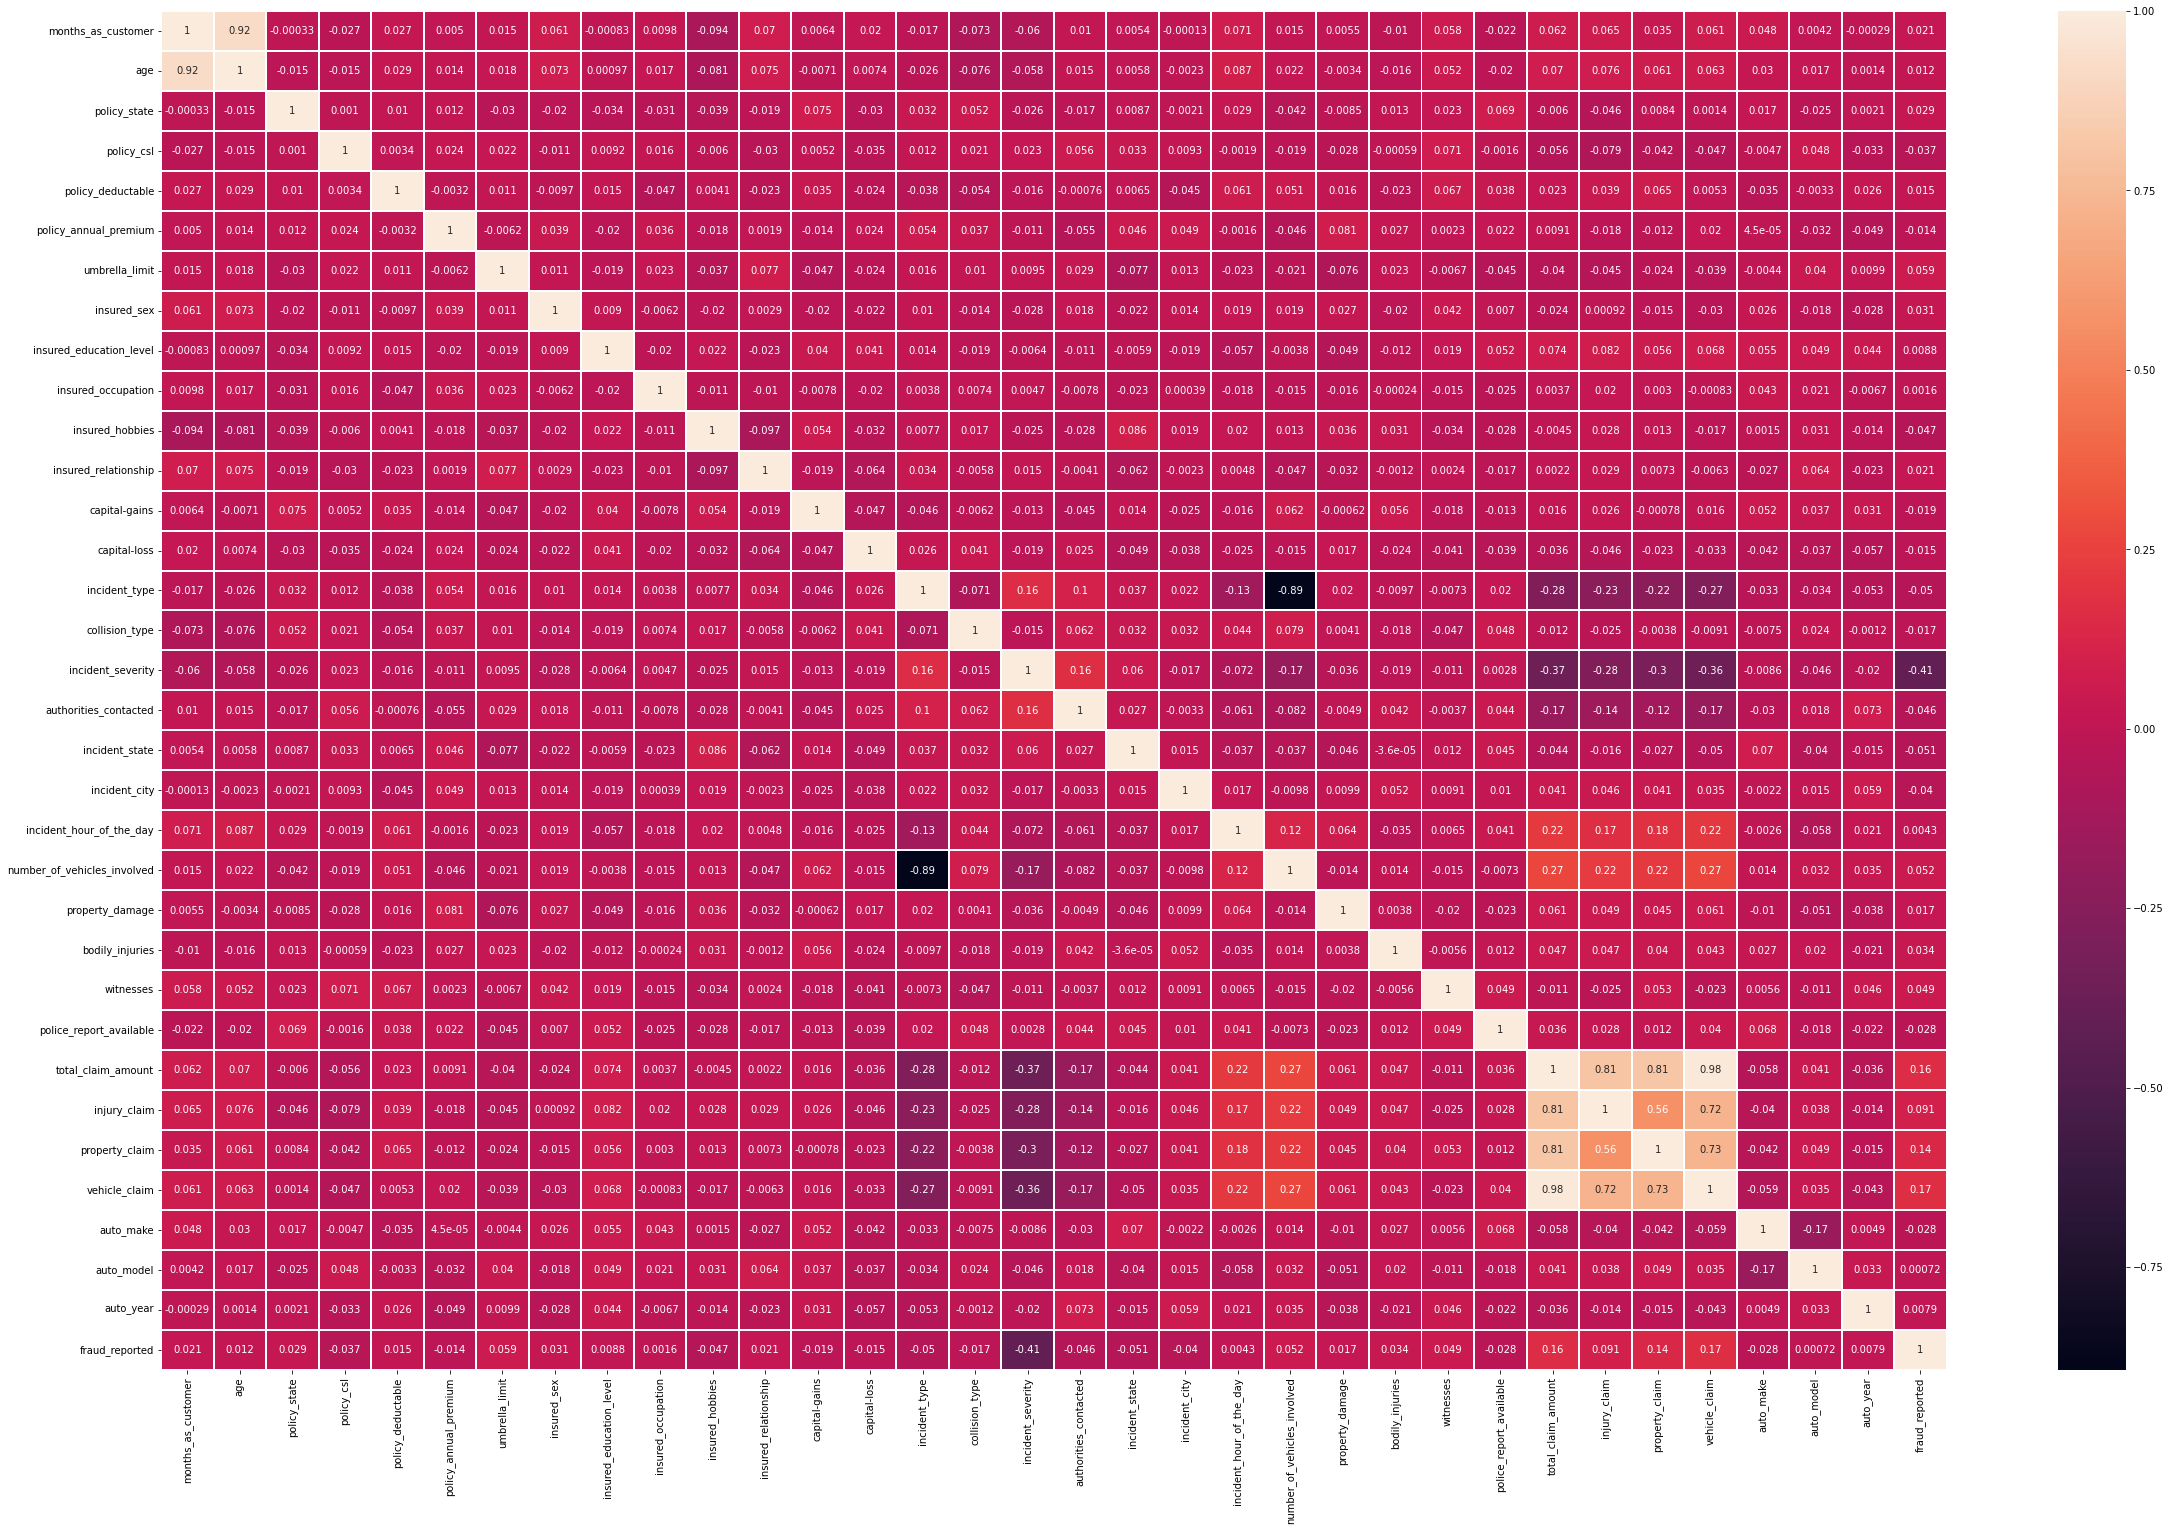

In [38]:
plt.figure(figsize=[40,25])
sns.heatmap(df.corr(), annot=True, linewidths=1)

1. age has very high correlation with months_as_customers.
2. vehicle claim have high correlation with total_claim_amount, injury_claim, property_claim.
3. incident_type has very high  negative correlation with number_vehicle_involved.

In [39]:
df.drop(['age','vehicle_claim', 'injury_claim', 'property_claim', 'incident_type'], axis=1, inplace=True)

<AxesSubplot:>

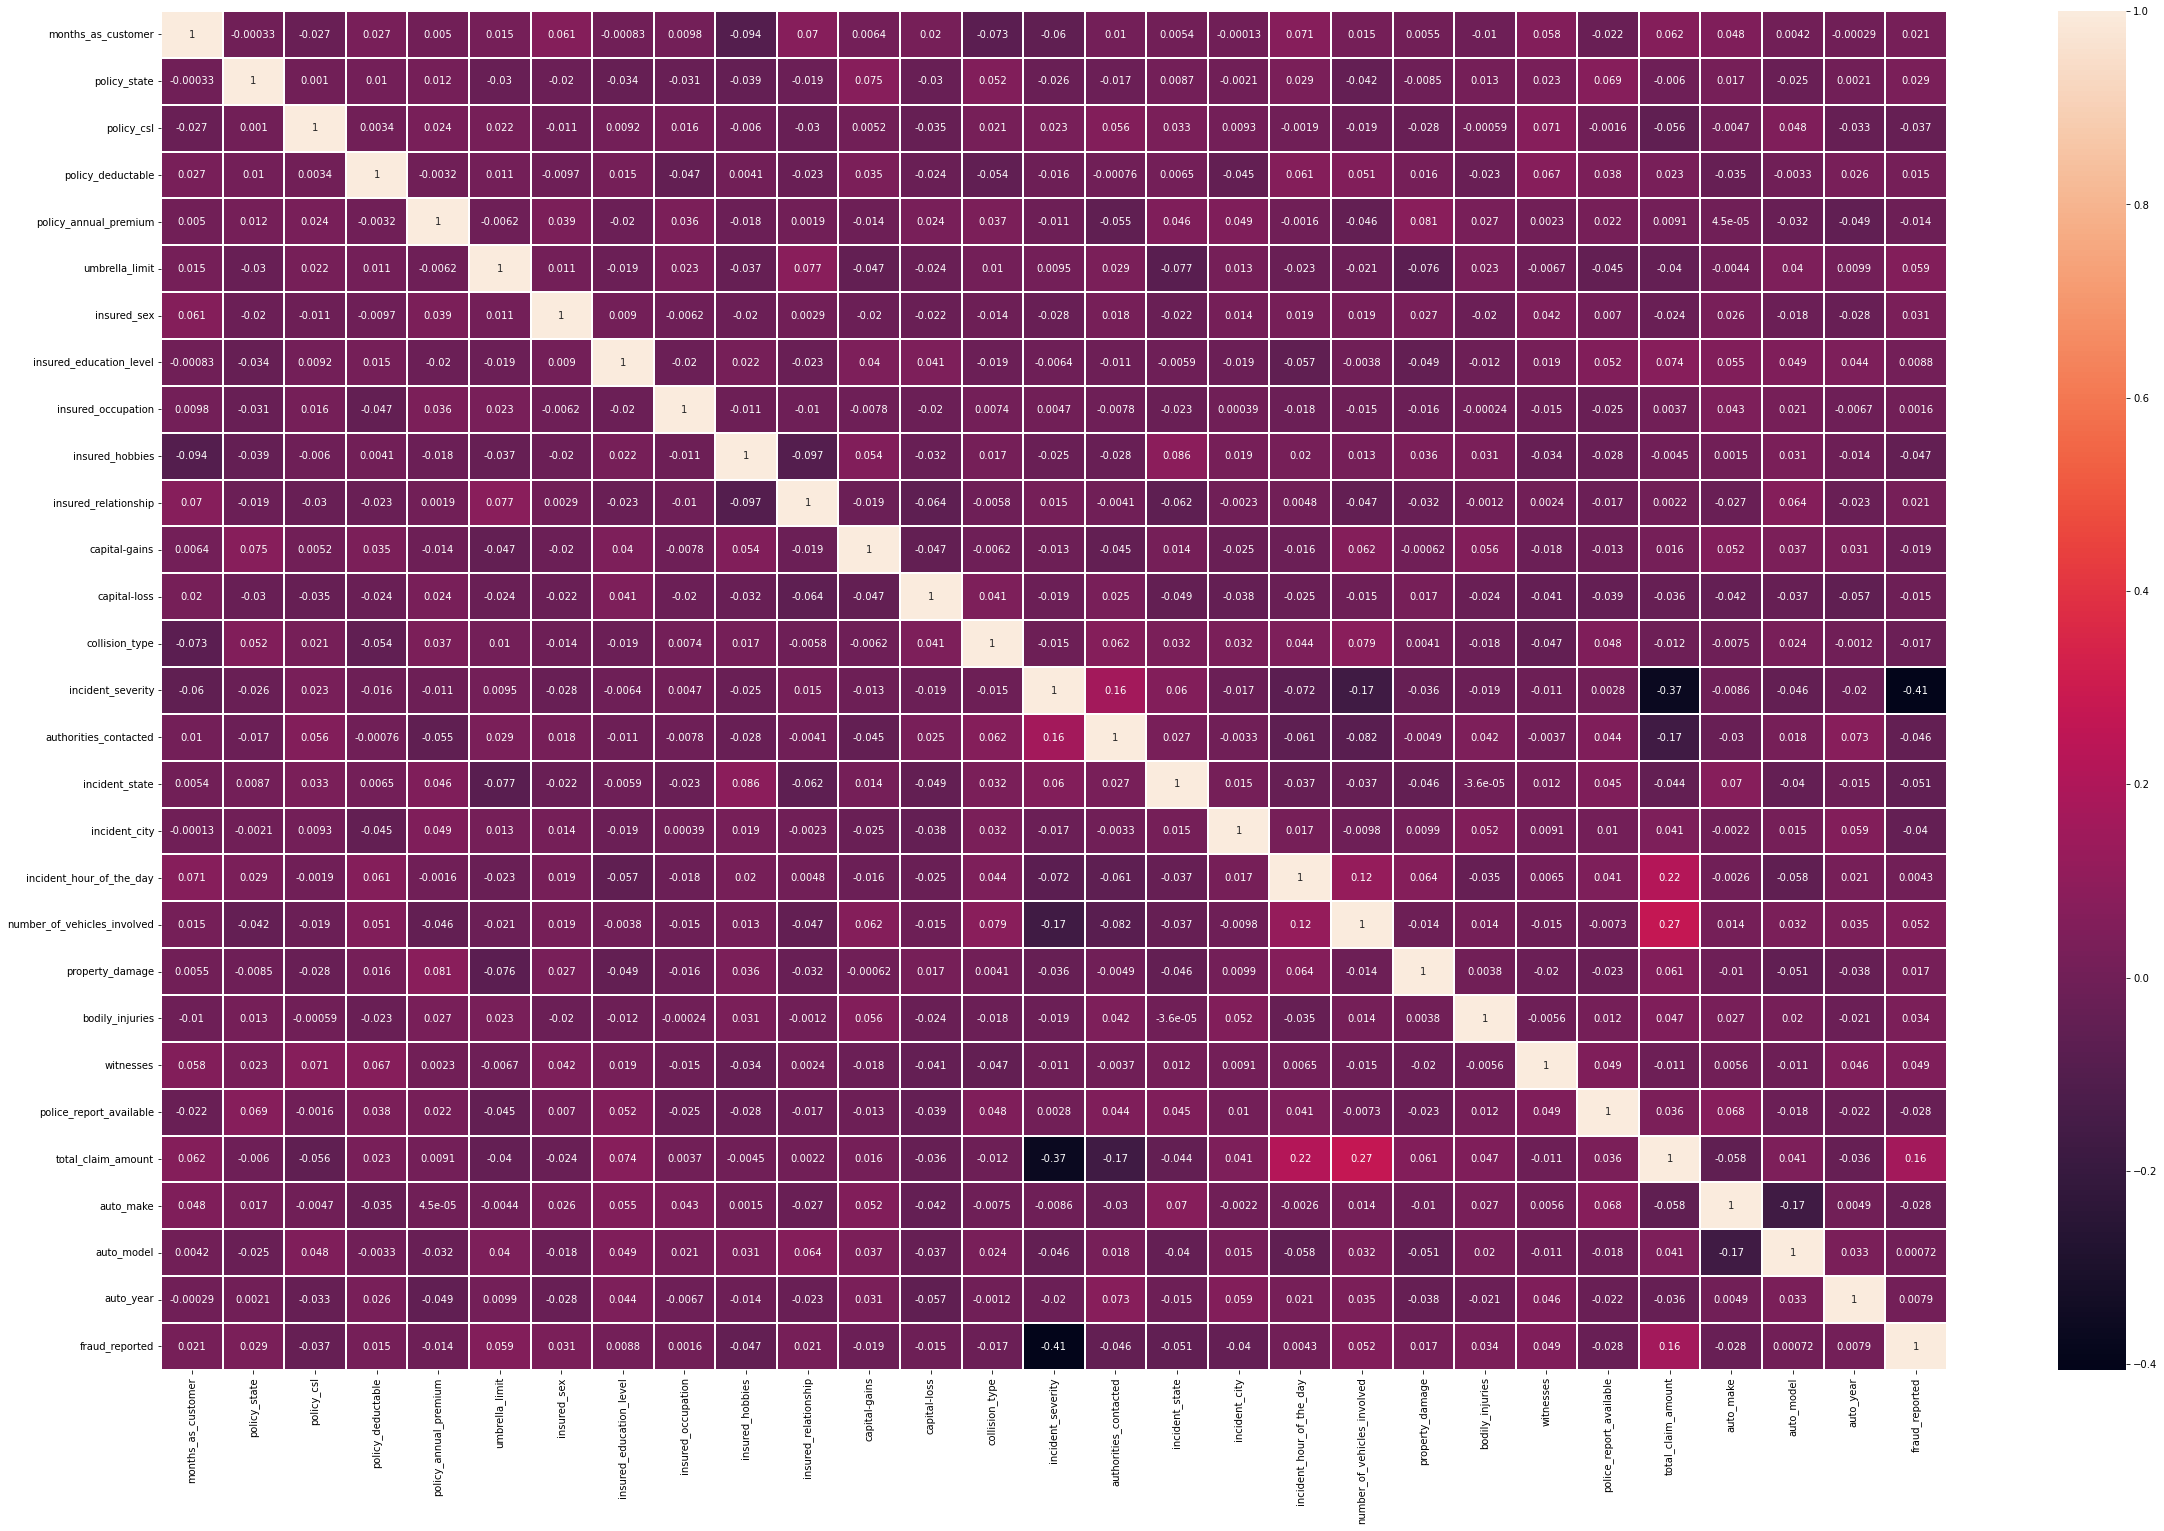

In [40]:
plt.figure(figsize=[40,25])
sns.heatmap(df.corr(), annot=True, linewidths=1)

In [41]:
df.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582


Note: The number of non binary numerical features is very large (25), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

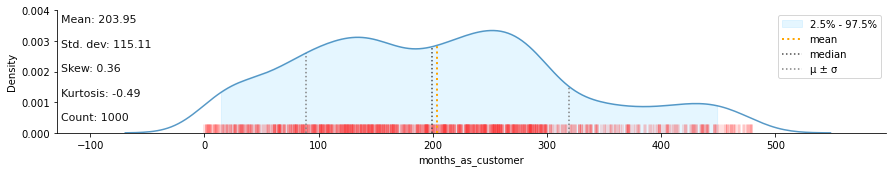

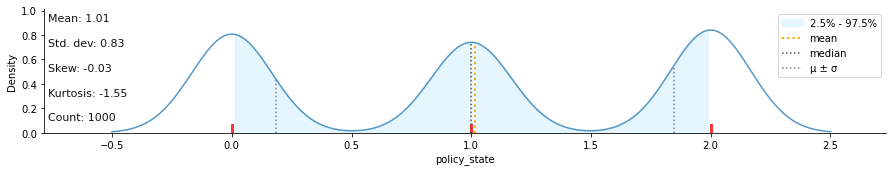

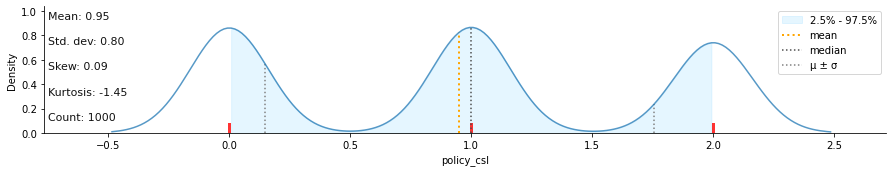

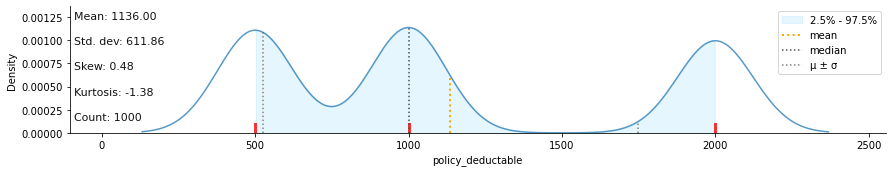

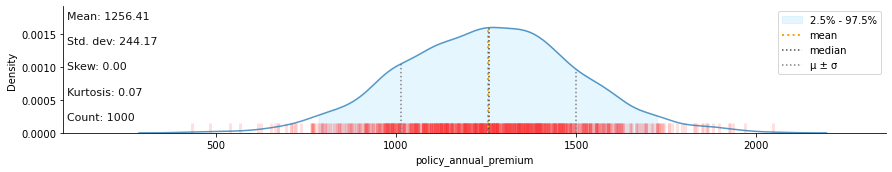

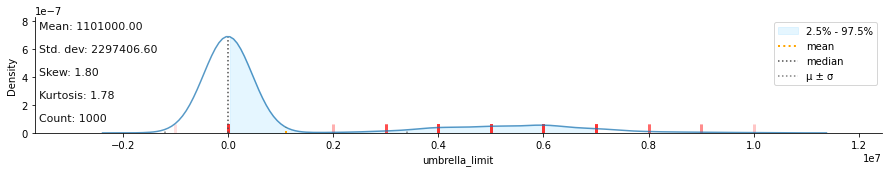

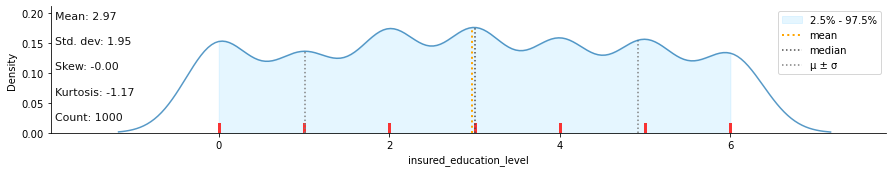

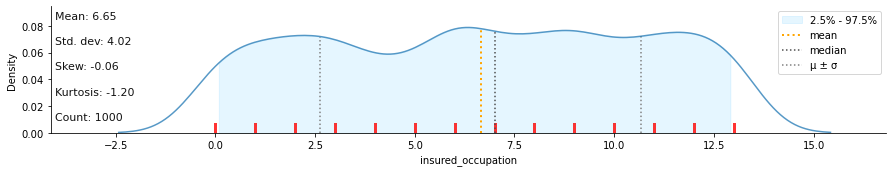

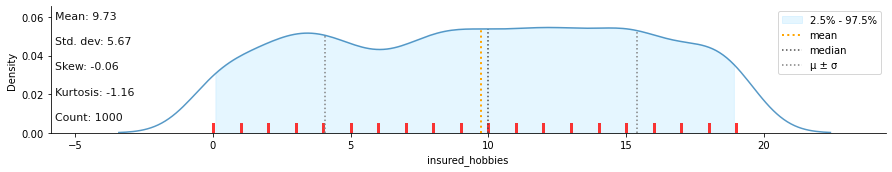

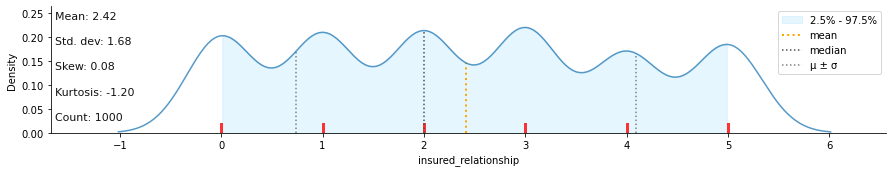

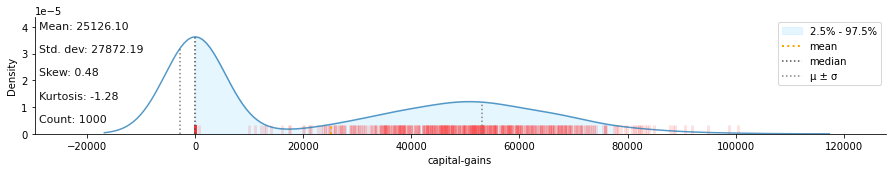

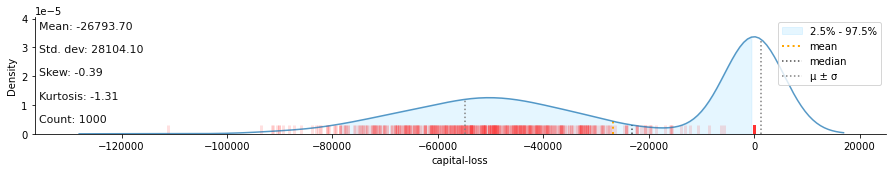

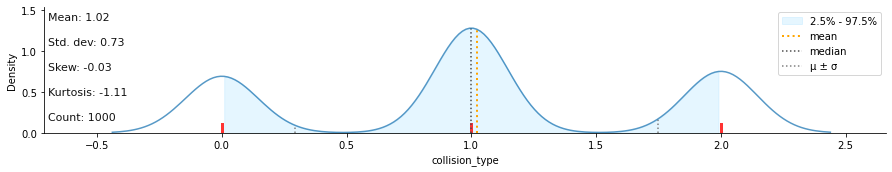

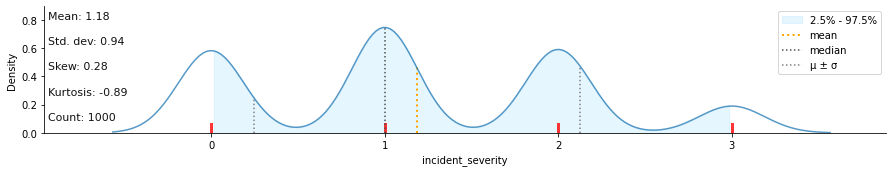

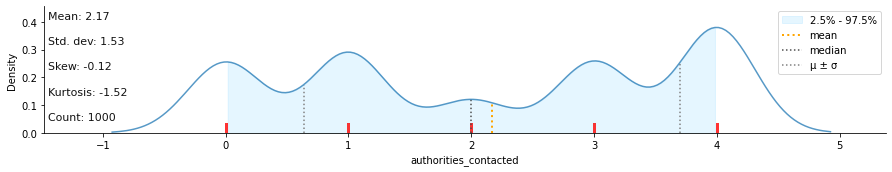

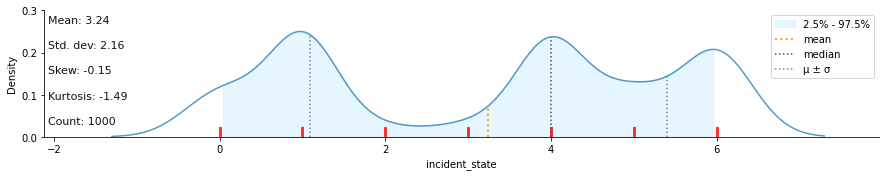

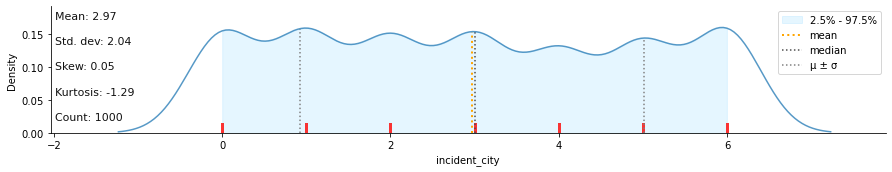

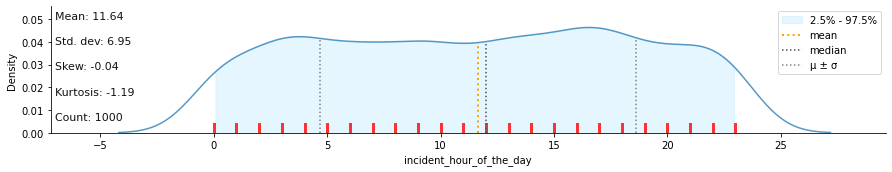

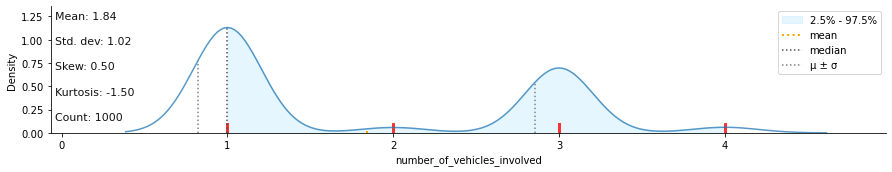

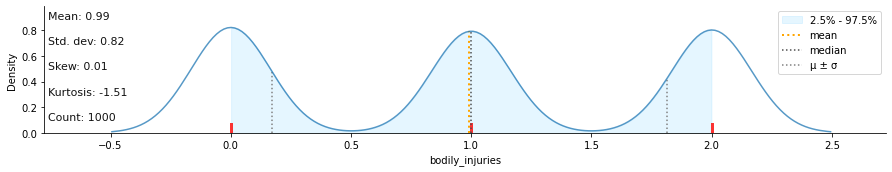

In [42]:
import klib
klib.dist_plot(df)

As we can see in most of the features the skewness is much more lower, even though i will check for the outliers and will remove them if we can afford to drop them.

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

df_new=df[(z<3).all(axis=1)]
df_new.shape

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 807, 875, 922, 975]), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5,  5,  5,  5,  4, 12,  5,
        5,  5]))


(981, 29)

When i checked the outliers, we got only 19 records and if we drop them there will be loss of 2% of the data which is acceptable Hence i will proceed with it.

In [44]:
dfx = df_new.iloc[:,:-1]
dfx

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year
0,328,2,1,1000,1406.91,0,1,4,2,17,...,5,1,1,1,2,1,71610,10,1,2004
1,228,1,1,2000,1197.22,5000000,1,4,6,15,...,8,1,0,0,0,0,5070,8,12,2007
2,134,2,0,2000,1413.14,5000000,0,6,11,2,...,7,3,0,2,3,0,34650,4,30,2007
3,256,0,1,2000,1415.74,6000000,0,6,1,2,...,5,1,0,1,2,0,63400,3,34,2014
4,228,0,2,1000,1583.91,6000000,1,0,11,2,...,20,1,0,0,1,0,6500,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1000,1310.80,0,0,5,2,13,...,20,1,1,0,1,0,87200,6,6,2006
996,285,0,0,1000,1436.79,0,0,6,9,17,...,23,1,1,2,3,0,108480,13,28,2015
997,130,2,1,500,1383.49,3000000,0,5,1,3,...,4,3,0,2,3,1,67500,11,19,1996
998,458,0,2,2000,1356.92,5000000,1,0,5,0,...,2,1,0,0,1,1,46980,1,5,1998


In [45]:
dfy = df_new.iloc[:,-1:]
dfy

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

Now i will balance the target classes so that we can fit them in them ML.

In [47]:
trainx, trainy = sm.fit_resample(dfx, dfy)

In [48]:
trainx.shape

(1482, 28)

In [49]:
trainy.shape

(1482, 1)

In [50]:
trainy.value_counts()

fraud_reported
1                 741
0                 741
dtype: int64

With the help of SMOTE we have balance the dataset. Now we have equal number of rows for both classes.

In [51]:
from sklearn.preprocessing import power_transform
data = power_transform(trainx, method = "yeo-johnson")
data

array([[ 1.07971188,  1.23876032,  0.44017272, ...,  0.95861582,
        -1.89954343, -0.18853227],
       [ 0.27250525,  0.20783023,  0.44017272, ...,  0.4869096 ,
        -0.56790961,  0.33748686],
       [-0.59632526,  1.23876032, -1.13324345, ..., -0.55521791,
         1.06118934,  0.33748686],
       ...,
       [-0.57617803,  0.20783023,  0.44017272, ..., -0.84722665,
        -1.47199602, -0.01393056],
       [ 0.41648022, -1.22139603, -1.13324345, ...,  0.24067627,
         1.46558257,  1.59098443],
       [ 1.78452485,  0.20783023, -1.13324345, ..., -1.89586903,
         0.55383134, -1.05057997]])

In [52]:
x = pd.DataFrame(data)
x

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.079712,1.238760,0.440173,0.0,0.690349,-0.368971,1.234788,0.651312,-1.181300,1.339872,...,-1.003390,-0.867322,1.805165,0.264984,0.661973,1.755746,0.687284,0.958616,-1.899543,-0.188532
1,0.272505,0.207830,0.440173,0.0,-0.242429,1.397511,1.234788,0.651312,-0.046993,1.028471,...,-0.518037,-0.867322,-0.553966,-1.213285,-1.384628,-0.569558,-1.949489,0.486910,-0.567910,0.337487
2,-0.596325,1.238760,-1.133243,0.0,0.717905,1.397511,-0.809855,1.573482,1.156242,-1.427545,...,-0.675951,1.256948,-0.553966,1.293508,1.418957,-0.569558,-0.944878,-0.555218,1.061189,0.337487
3,0.507989,-1.221396,0.440173,0.0,0.729402,1.691541,-0.809855,1.573482,-1.515796,-1.427545,...,-1.003390,-0.867322,-0.553966,0.264984,0.661973,-0.569558,0.300917,-0.847227,1.385874,1.590984
4,0.272505,-1.221396,1.372355,0.0,1.470027,1.691541,1.234788,-1.642204,1.156242,-1.427545,...,1.200295,-0.867322,-0.553966,-1.213285,-0.230974,-0.569558,-1.913074,-1.895869,1.143282,0.691875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0.483155,1.238760,0.440173,0.0,1.698189,-0.368971,-0.809855,-1.642204,-0.873884,-1.997930,...,0.654855,-0.867322,-0.553966,0.264984,0.661973,-0.569558,0.217814,-0.278524,-0.671012,0.691875
1478,1.064395,-1.221396,1.372355,0.0,0.076303,-0.368971,-0.809855,0.153108,-1.181300,0.019644,...,-0.837525,-0.867322,-0.553966,1.293508,0.661973,-0.569558,-1.949119,0.486910,0.978441,0.337487
1479,-0.576178,0.207830,0.440173,0.0,-0.508645,-0.368971,-0.809855,-1.642204,-0.873884,-0.546625,...,0.654855,1.256948,-0.553966,-1.213285,0.661973,-0.569558,-1.049668,-0.847227,-1.471996,-0.013931
1480,0.416480,-1.221396,-1.133243,0.0,1.063623,1.691541,-0.809855,0.651312,-0.873884,-1.997930,...,-1.953156,0.654416,-0.553966,0.264984,-0.230974,-0.569558,0.112007,0.240676,1.465583,1.590984


As i could not remove the outliers, i have transformed the dataset and as the result the skewness in the data has reduced.

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.07971188,  1.23876032,  0.44017272, ...,  0.95861582,
        -1.89954343, -0.18853227],
       [ 0.27250525,  0.20783023,  0.44017272, ...,  0.4869096 ,
        -0.56790961,  0.33748686],
       [-0.59632526,  1.23876032, -1.13324345, ..., -0.55521791,
         1.06118934,  0.33748686],
       ...,
       [-0.57617803,  0.20783023,  0.44017272, ..., -0.84722665,
        -1.47199602, -0.01393056],
       [ 0.41648022, -1.22139603, -1.13324345, ...,  0.24067627,
         1.46558257,  1.59098443],
       [ 1.78452485,  0.20783023, -1.13324345, ..., -1.89586903,
         0.55383134, -1.05057997]])

In [54]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score we can achive is  ", maxscore, 'at an ideal Random state ', maxRS)

Best accuracy score we can achive is   0.8382022471910112 at an ideal Random state  87


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=87)

In [57]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(), RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.8202247191011236
[[180  42]
 [ 38 185]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       222
           1       0.81      0.83      0.82       223

    accuracy                           0.82       445
   macro avg       0.82      0.82      0.82       445
weighted avg       0.82      0.82      0.82       445



accuracy_score of SVC() is:
0.8404494382022472
[[188  34]
 [ 37 186]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       222
           1       0.85      0.83      0.84       223

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



accuracy_score of KNeighborsClassifier() is:
0.7280898876404495
[[110 112]
 [  9 214]]
              precision    recall  f1-score   support

           0       0.92      0.50      0.

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,trainy,cv=kfold)
    print(i, "CV Score is ",score.mean())

DecisionTreeClassifier() CV Score is  0.7800800800800801
SVC() CV Score is  0.8421808171808172
KNeighborsClassifier() CV Score is  0.6952156702156702
RandomForestClassifier() CV Score is  0.8516107016107017
LogisticRegression() CV Score is  0.7767108017108016


RandomForestClassifier has the least difference when we compared the accuracy score with CV Score.

In [59]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False],
             'criterion' : ['gini', 'entropy']}

In [60]:
from sklearn.model_selection import GridSearchCV
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [61]:
GSV.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 13,
 'oob_score': False}

In [67]:
Final_model = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_features= 'log2', min_samples_split= 2, n_estimators= 13, oob_score=False)
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.9438202247191
[[188  34]
 [ 33 190]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       222
           1       0.85      0.85      0.85       223

    accuracy                           0.85       445
   macro avg       0.85      0.85      0.85       445
weighted avg       0.85      0.85      0.85       445



In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [69]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.92307692, 0.07692308, 0.84615385, 0.23076923, 0.61538462,
       0.07692308, 0.23076923, 0.76923077, 1.        , 0.84615385,
       0.69230769, 0.46153846, 0.92307692, 1.        , 0.53846154,
       0.        , 0.69230769, 0.46153846, 0.38461538, 1.        ,
       0.07692308, 0.46153846, 0.30769231, 0.15384615, 0.38461538,
       0.92307692, 1.        , 1.        , 0.76923077, 0.15384615,
       0.07692308, 0.15384615, 0.69230769, 0.92307692, 1.        ,
       0.53846154, 0.61538462, 0.61538462, 0.23076923, 1.        ,
       0.23076923, 0.30769231, 1.        , 0.76923077, 0.30769231,
       0.92307692, 0.23076923, 0.15384615, 0.        , 0.30769231,
       0.        , 0.15384615, 0.07692308, 0.15384615, 0.15384615,
       0.38461538, 0.23076923, 0.        , 0.38461538, 1.        ,
       0.23076923, 0.23076923, 0.15384615, 0.46153846, 0.92307692,
       0.15384615, 1.        , 0.92307692, 1.        , 0.92307692,
       0.69230769, 0.15384615, 0.76923077, 0.76923077, 0.69230

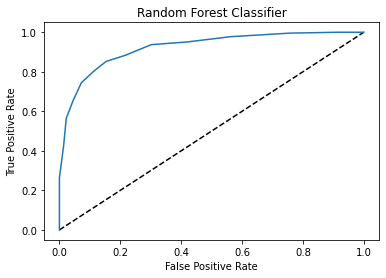

AUC_ROC Score =  0.8494323920332889


In [70]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('AUC_ROC Score = ',auc_score)

In [71]:
import joblib
joblib.dump(Final_model,'Churn_Analysis.obj')

['Churn_Analysis.obj']

Finally with the help of hyperparameter tuning i achieved the accuracy score of 85%.